# E-commerce Data Analysis - Customer Segmentation
## Task 3: Clustering Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

C:\Users\pathe\AppData\Local\Temp\ipykernel_10292\1239797607.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Data Loading and Preparation

In [2]:
# Load datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Convert dates
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

### Feature Engineering for Clustering

In [5]:
def create_clustering_features(customers_df, transactions_df):
    # Handle NaN values in transactions
    transactions_df = transactions_df.fillna({
        'TotalValue': 0,
        'Quantity': 0,
        'TransactionDate': transactions_df['TransactionDate'].max()
    })
    
    # Transaction-based features
    customer_features = transactions_df.groupby('CustomerID').agg({
        'TotalValue': ['sum', 'mean', 'std'],
        'Quantity': ['sum', 'mean'],
        'TransactionID': 'count'
    }).fillna({
        ('TotalValue', 'std'): 0  # Fill NaN in std for customers with single transaction
    })
    
    # Flatten column names
    customer_features.columns = [
        'total_spend', 'avg_transaction', 'std_transaction',
        'total_quantity', 'avg_quantity', 'transaction_count'
    ]
    
    # Customer recency feature
    latest_transaction = transactions_df.groupby('CustomerID')['TransactionDate'].max()
    customer_features['days_since_last_purchase'] = \
        (transactions_df['TransactionDate'].max() - latest_transaction).dt.days
    
    # Add customer region (one-hot encoded)
    region_dummies = pd.get_dummies(customers_df.set_index('CustomerID')['Region'], prefix='region')
    customer_features = customer_features.join(region_dummies, how='left').fillna(0)
    
    # Ensure all customers have features
    all_customers = pd.DataFrame(index=customers_df['CustomerID'])
    customer_features = all_customers.join(customer_features, how='left').fillna(0)
    
    return customer_features

def evaluate_clusters(X, max_clusters=10):
    # Ensure no NaN values in input
    if np.isnan(X).any():
        print("Warning: Input contains NaN values. Filling with 0...")
        X = np.nan_to_num(X, 0)
    
    db_scores = []
    silhouette_scores = []
    inertias = []
    
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X)
        
        db_scores.append(davies_bouldin_score(X, labels))
        silhouette_scores.append(silhouette_score(X, labels))
        inertias.append(kmeans.inertia_)
    
    return db_scores, silhouette_scores, inertias

# Usage in notebook:
# Load and prepare data
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Convert dates
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Create features
clustering_features = create_clustering_features(customers_df, transactions_df)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_features)

# Evaluate clusters
db_scores, silhouette_scores, inertias = evaluate_clusters(X_scaled)

c:\Users\pathe\Desktop\Zeotap\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pathe\Desktop\Zeotap\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pathe\Desktop\Zeotap\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pathe\Desktop\Zeotap\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pathe\D

### Finding Optimal Number of Clusters

c:\Users\pathe\Desktop\Zeotap\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pathe\Desktop\Zeotap\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pathe\Desktop\Zeotap\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pathe\Desktop\Zeotap\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pathe\D

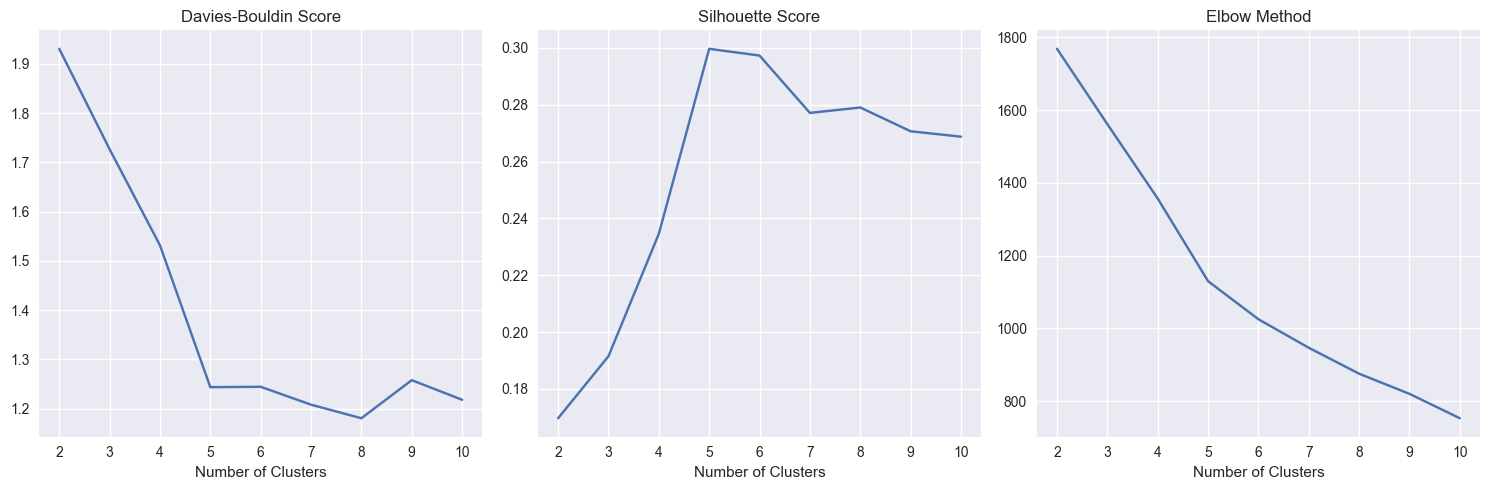

In [6]:
def evaluate_clusters(X, max_clusters=10):
    db_scores = []
    silhouette_scores = []
    inertias = []
    
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X)
        
        db_scores.append(davies_bouldin_score(X, labels))
        silhouette_scores.append(silhouette_score(X, labels))
        inertias.append(kmeans.inertia_)
    
    return db_scores, silhouette_scores, inertias

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_features)

# Evaluate different numbers of clusters
db_scores, silhouette_scores, inertias = evaluate_clusters(X_scaled)

# Plot evaluation metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(range(2, 11), db_scores)
axes[0].set_title('Davies-Bouldin Score')
axes[0].set_xlabel('Number of Clusters')

axes[1].plot(range(2, 11), silhouette_scores)
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Number of Clusters')

axes[2].plot(range(2, 11), inertias)
axes[2].set_title('Elbow Method')
axes[2].set_xlabel('Number of Clusters')

plt.tight_layout()
plt.show()

### Final Clustering and Analysis

In [7]:
# Perform final clustering with optimal number of clusters
n_clusters = 5  # Change this based on evaluation results
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Calculate final DB Index
final_db_index = davies_bouldin_score(X_scaled, cluster_labels)
print(f'Final Davies-Bouldin Index: {final_db_index:.4f}')

# Add cluster labels to features
clustering_features['Cluster'] = cluster_labels

Final Davies-Bouldin Index: 1.2435


c:\Users\pathe\Desktop\Zeotap\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Cluster Visualization

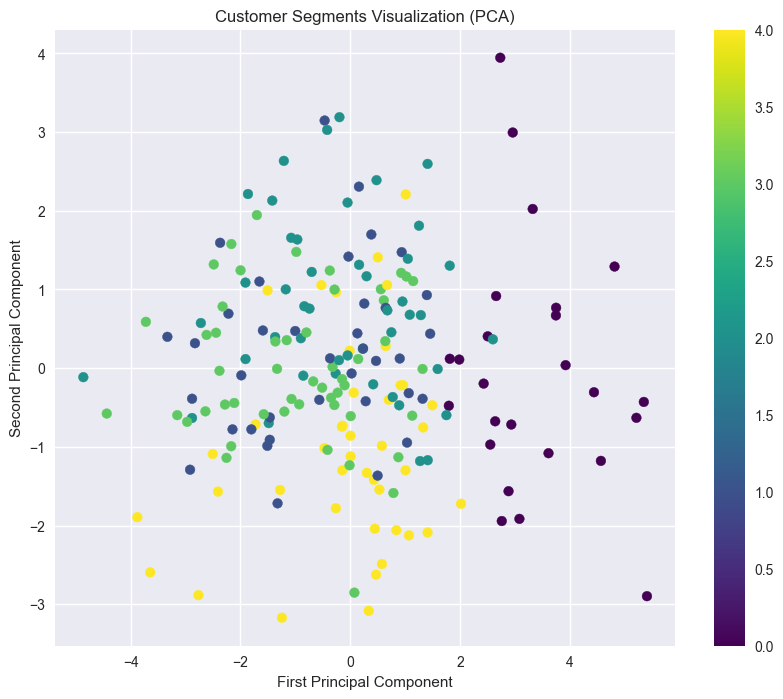


Cluster Characteristics:
         total_spend  avg_transaction  std_transaction  total_quantity  \
Cluster                                                                  
0         774.838800       425.340247        84.905047        3.840000   
1        3927.727568       724.383517       496.769984       14.432432   
2        3617.577333       747.405663       500.805007       12.755556   
3        4172.610980       751.992745       518.756679       14.705882   
4        3564.393571       652.568455       432.626282       13.880952   

         avg_quantity  transaction_count  days_since_last_purchase  \
Cluster                                                              
0            1.988000           2.000000                147.880000   
1            2.603958           5.567568                 53.918919   
2            2.614559           4.888889                 69.666667   
3            2.636220           5.588235                 57.196078   
4            2.511418           5.6

In [8]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Customer Segments Visualization (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

# Analyze cluster characteristics
cluster_summary = clustering_features.groupby('Cluster').mean()
print("\nCluster Characteristics:")
print(cluster_summary)